In [3]:
import xml.etree.ElementTree as ET
import pandas as pd
import glob
import errno

In [79]:
train_numbers_df = pd.DataFrame()

path = './data/bp_bg_meters/train_annotations/*.xml'   
files = glob.glob(path)   
image_id = 0
for name in files: 
    try:
        print("Parsing file", name)
        annotation_xml = ET.parse(name)
        image_path = annotation_xml.getroot().find('path').text
        box_id = 0
        for box in annotation_xml.getroot().findall('object'):
            box_class = box.find("name").text
            
            box_coords = box.find('bndbox')
            box_xmin = box_coords.find('xmin').text
            box_ymin = box_coords.find('ymin').text
            box_xmax = box_coords.find('xmax').text
            box_ymax = box_coords.find('ymax').text
            
            train_number_row = pd.Series({
                    'image_id': image_id,
                    'image_path': image_path,
                    'box_order': box_id,
                    'class': box_class, 
                    'xmin': box_xmin, 
                    'ymin': box_ymin, 
                    'xmax': box_xmax,
                    'ymax': box_ymax
            }) 
            train_numbers_df = train_numbers_df.append(train_number_row, ignore_index=True)
            box_id += 1
        image_id += 1
    except IOError as exc:
        if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
            raise # Propagate other kinds of IOError.

Parsing file ./data/bp_bg_meters/train_annotations/IMG_5839.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133325.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_3904.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_132007.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_1915.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5794.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5958.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133250.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_4688.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_9347.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133318.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_6128.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMAG0076.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5810.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5838.xml
Parsing file

In [80]:
train_numbers_df.head(10)

,box_order,class,image_id,image_path,xmax,xmin,ymax,ymin
0,0.0,1,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2166,1740,2070,1799
1,1.0,5,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2186,1710,1775,1514
2,2.0,0,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2131,1690,1535,1194
3,3.0,9,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2661,2165,1785,1469
4,4.0,4,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2601,2135,1455,1154
5,5.0,7,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,3141,2655,1725,1339
6,6.0,7,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,3126,2620,1380,1114
7,0.0,4,1.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2201,1480,1693,1232
8,1.0,4,1.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2176,1485,1158,767
9,0.0,6,2.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2296,1270,2020,1474


In [81]:
train_numbers_df.size

8688

In [82]:
from matplotlib import pyplot as plt

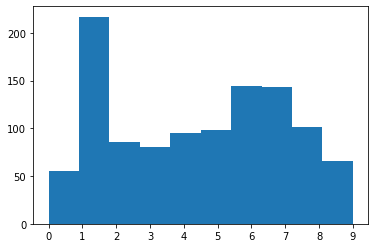

In [83]:
plt.hist(train_numbers_df['class'].sort_values(ascending=True))
plt.show()

In [84]:
train_numbers_df['width'] = train_numbers_df['xmax'].astype(int) - train_numbers_df['xmin'].astype(int)
train_numbers_df['height'] = train_numbers_df['ymax'].astype(int) - train_numbers_df['ymin'].astype(int)

train_numbers_df['portrait'] = train_numbers_df.apply(
    (lambda x: 1 if x['width'] < x['height'] else 0)
, axis=1)

In [86]:
train_numbers_df.head()

,box_order,class,image_id,image_path,xmax,xmin,ymax,ymin,width,height,portrait
0,0.0,1,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2166,1740,2070,1799,426,271,0
1,1.0,5,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2186,1710,1775,1514,476,261,0
2,2.0,0,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2131,1690,1535,1194,441,341,0
3,3.0,9,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2661,2165,1785,1469,496,316,0
4,4.0,4,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2601,2135,1455,1154,466,301,0


In [87]:
image_orientation_df = train_numbers_df.groupby('image_id').agg({'portrait':'max'}).reset_index()
image_orientation_df.head()

,image_id,portrait
0,0.0,0
1,1.0,0
2,2.0,0
3,3.0,0
4,4.0,1


In [88]:
train_numbers_df = train_numbers_df.drop(columns=['portrait'])

In [89]:
train_numbers_df = pd.merge(train_numbers_df, image_orientation_df, on='image_id')

In [90]:
train_numbers_df.set_index(['image_id',"portrait"]).count(level='portrait')

,box_order,class,image_path,xmax,xmin,ymax,ymin,width,height
portrait,,,,,,,,,
0,817,817,817,817,817,817,817,817,817
1,269,269,269,269,269,269,269,269,269


In [91]:
# 817 landscape, 269 portrait

## Get the digit image from the image file

/Users/gbishop/lighthouse/data_bootcamp/digital-display-reader/data/bp_bg_meters/train/IMG_5839.JPG co-ords x 1710 - 1514


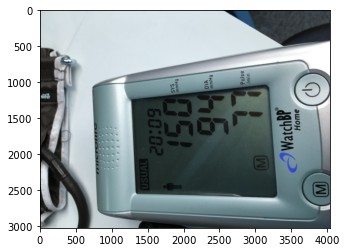

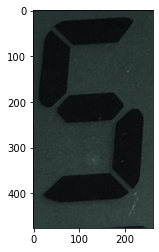

In [102]:
import cv2
import numpy as np

number_row = train_numbers_df.loc[1]
image_path = number_row['image_path']

x = int(number_row['xmin'])
y = int(number_row['ymin'])
print("{0} co-ords x {1} - {2}".format(image_path, x, y))
w = number_row['width']
h = number_row['height']
image = cv2.imread(image_path)

if (not number_row['portrait']):
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) 

num_img = image[y:y+h, x:x+w]

if (not number_row['portrait']):
    num_img = cv2.rotate(num_img, cv2.ROTATE_90_CLOCKWISE) 

plt.imshow(image)
plt.show()
plt.imshow(num_img)
plt.show()


In [100]:
type(num_img)

numpy.ndarray

In [108]:
num_img.shape

(476, 261, 3)

In [109]:
# Save as numpy.memmap to a binary file, so you don't process over and over

In [116]:
import char_bounding.lhl_image_transform as lhl
import importlib
import imutils
importlib.reload(lhl)

<module 'char_bounding.lhl_image_transform' from '/Users/gbishop/lighthouse/data_bootcamp/digital-display-reader/char_bounding/lhl_image_transform.py'>

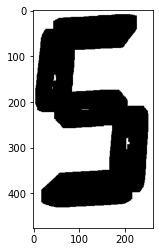

In [113]:
num_img_p = lhl.img_process(num_img)
lhl.plot_image(num_img_p)

In [114]:
num_img_p.shape

(476, 261)

In [117]:
import char_bounding.lhl_image_transform as lhl

def create_image_digit_array(x_row):
    img_num_arr = lhl.extract_bounded_image(
        x_row['image_path'],
        int(x_row['xmin']),
        int(x_row['ymin']),
        x_row['width'],
        x_row['height'],
        x_row['portrait']
    )
    return lhl.img_process(img_num_arr)

train_numbers_df['img_num_arr'] = train_numbers_df.apply(
    (lambda x: create_image_digit_array(x))
, axis=1)


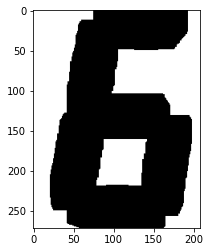

In [121]:
lhl.plot_image(train_numbers_df.loc[152]['img_num_arr'])